<a href="https://colab.research.google.com/github/tomcat472/geopandas_myanmar/blob/main/geopandas_2023_part03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# google drive နှင့် link ချိတ်ခြင်း
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

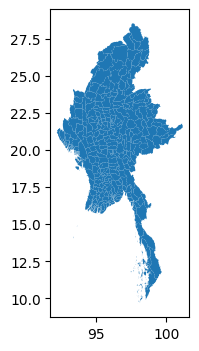

In [3]:
mm=gpd.read_file('/content/drive/MyDrive/Shape File/Myanmar Township Boundaries/mmr_polbnda_250k_adm3_mimu.shp')
# ပုံအရွယ်အစားပြောင်းလဲခြင်း
mm.plot(figsize=(4,4))

# Choropleth maps

In [4]:
# Choropleth maps (maps where the color of each shape is based on the value of an associated variable)

<Axes: >

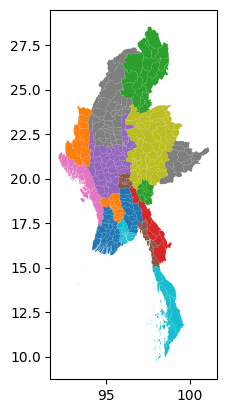

In [5]:
# geopandas ဖြင့် choropleth map လုပ်မယ်ဆိုရင် ကိုယ်လုပ်ချင်တဲ့ column ကိုရွေးပေးရပါတယ်။
mm.plot(column='ST')

<Axes: >

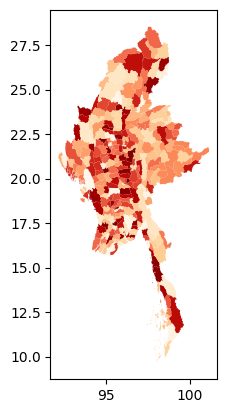

In [6]:
# colormap အားအသုံးပြုခြင်း
# colormap အသေးစိတ်သိချင်ရင် https://matplotlib.org/stable/tutorials/colors/colormaps.html မှာဖတ်ပါ။
mm.plot(column='TS',cmap='OrRd')

<Axes: >

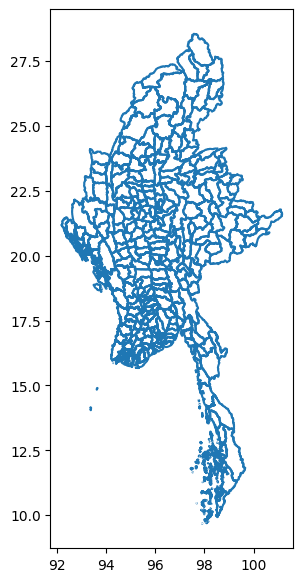

In [7]:
# boundery plot ပြုလုပ်ခြင်း
mm.boundary.plot(figsize=(7,7))

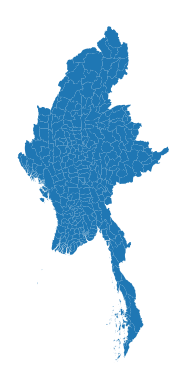

In [8]:
# axis label တွေမလိုချင်တဲ့အခါ သူတို့ကို ပိတ်ထားလို့ရပါတယ်။
ax=mm.plot()
ax.set_axis_off()

# numeric column များအားအသုံးပြု၍ ploting ပြုလုပ်ခြင်း

<Axes: >

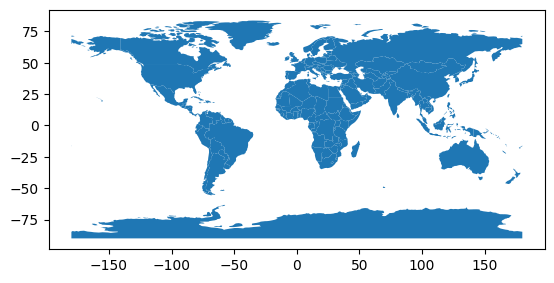

In [9]:
country=gpd.read_file('/content/drive/MyDrive/Shape File/110m_admin_0_countries/ne_110m_admin_0_countries.shp')
country.plot()

In [10]:
# column နာမည်များအား ကြည့်ခြင်း
country.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

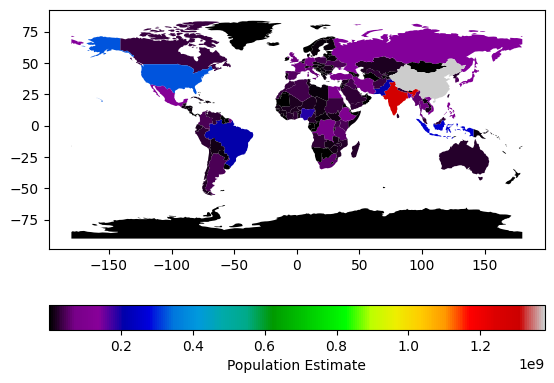

In [11]:
# legend=True လုပ်ထားရင် legend keyword များအားအသုံးပြုလို့ရပါတယ်။
country.plot(column='POP_EST',legend=True,cmap='nipy_spectral',
    legend_kwds={"label": "Population Estimate", "orientation": "horizontal"},
);

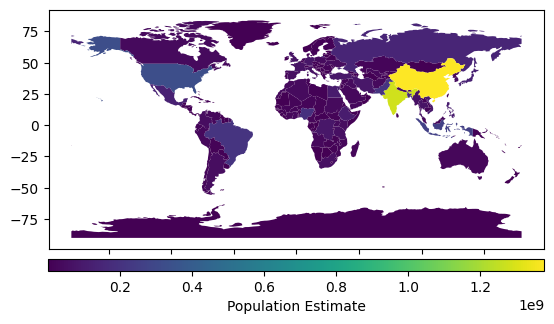

In [12]:
# matplotlib library အားအသုံးပြု၍လည်း legend များအား ပြင်လို့ရပါတယ်။
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("bottom", size="5%", pad=0.1)

country.plot(
    column="POP_EST",
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "Population Estimate", "orientation": "horizontal"}
);

# Map Classification ပြုလုပ်ခြင်း

In [14]:
# ပထမဆုံးအနေနဲ့ mapclassify library မရှိရင် install တင်ပေးရပါမယ်။
# pip install mapclassify
# ဒီနည်းများနဲ့ classification ပြုလုပ်လို့ရပါတယ်။ (‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’,
#  ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’,
#  ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’)

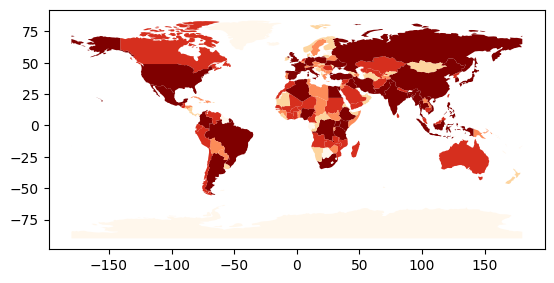

In [15]:
country.plot(column='POP_EST', cmap='OrRd',scheme='quantiles');